# Self-labeling of Fully Mediating Representations by Graph Alignment

This notebook is made available as supporting material for the paper:
https://openreview.net/forum?id=XEw5Onu69uu

## 1. Download Indigo dataset

In [15]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id ='16nAdDG78fnA3af7tWPhmg5MSjv1h5ZJS'
destination = './indigo_dataset.zip'
download_file_from_google_drive(file_id, destination)

In [23]:
from zipfile import ZipFile
import os 
with ZipFile('indigo_dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
os.mkdir('dataset_indigo') 

## 2. Preprocess Indigo dataset to correct format for ChemGrapher (1000x1000)

In [24]:
!python preprocess/preprocess_indigo_dataset.py --dataset_folder indigo_validation_set_examples/images --output_folder dataset_indigo --num_images 100

## 3. Try predicting SMILES given one image from Indigo dataset using a pretrained ChemGrapher model

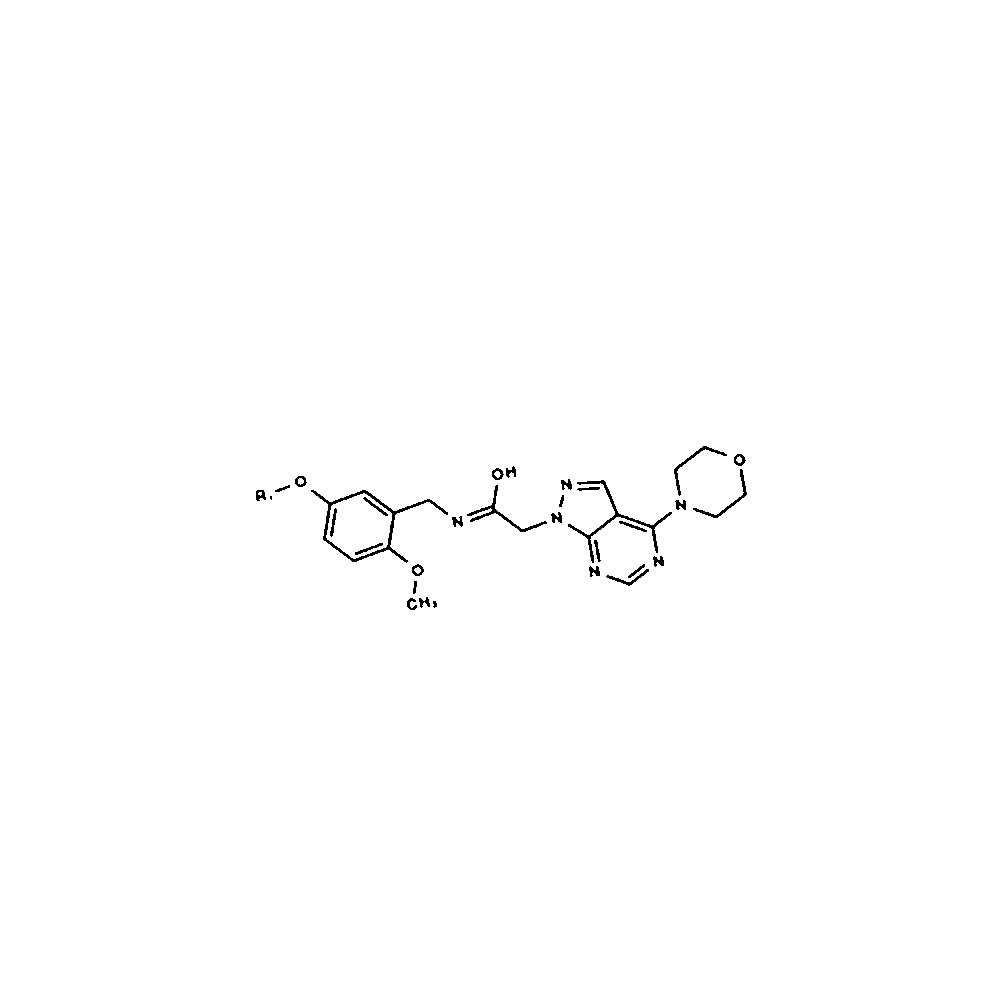

In [27]:
#Let us first have a look at the input image
#Feel free to change the image filename to test with other images
from IPython.display import Image
Image(filename='dataset_indigo/2.png') 

In [29]:
!python run_scripts/predict_smiles.py --inputfile dataset_indigo/2.png --segnetwork pretrained_models/segmentation/pretrained_segmentation.SAV --clas_bond_network pretrained_models/bond_clas/pretrained_clas_bond.SAV --clas_atom_network pretrained_models/atom_clas/pretrained_clas_atom.SAV --clas_charge_network pretrained_models/charge_clas/pretrained_clas_charge.SAV

Using segmentation model pretrained_models/segmentation/pretrained_segmentation.SAV
Using Bond Classification model pretrained_models/bond_clas/pretrained_clas_bond.SAV
Using Atom Classification model pretrained_models/atom_clas/pretrained_clas_atom.SAV
Using Charge Classification model pretrained_models/charge_clas/pretrained_clas_charge.SAV
(PREPROCESSED) SMILES FROM dataset_indigo/2.png: COOC1=CC=C(OF)C=C1CN=C(O)C[SH]1N=CC2=C([SH]3CCOCC3)N=CN=C21
(FILTERED) SMILES FROM dataset_indigo/2.png: COOc1ccc(OF)cc1C/N=C(\O)C[SH]1N=Cc2c([SH]3CCOCC3)ncnc21
